<a href="https://colab.research.google.com/github/abhranil-datascience/ReinforcementLearning/blob/master/UpperConfidenceBoundPOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Found the most popular ad: 4 at round 693


(array([  92.,   65.,   65.,   79., 9430.,   40.,   44.,   82.,   56.,
          47.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

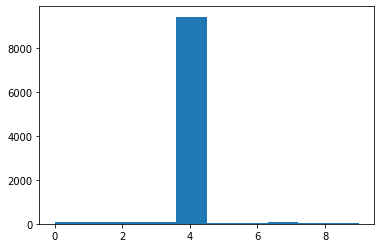

In [0]:
############################## Mount Drive ######################################## 
from google.colab import drive
drive.mount('/content/gdrive')
############################## Change Directory ###################################
import os
os.chdir('/content/gdrive/My Drive/MLandDLFullCourse/ML/ReinforcementLearning/UCB')
########## Suppress Warnings ############
import warnings
warnings.filterwarnings('ignore')
########## Import Dataset #################
import pandas as pd
dataset=pd.read_csv('Ads_CTR_Optimisation.csv')
Adlist=dataset.iloc[:,:].values
######### Calculate UCB ##################
import math as mt
sum_of_rewards=[0]*Adlist.shape[1]
num_of_selections=[0]*Adlist.shape[1]
ad_selected=[]
total_rewards=0
for rounds in range(0,Adlist.shape[0]):
  maxUCB=0
  ad=0
  for ad_num in range(0,Adlist.shape[1]):
    if num_of_selections[ad_num]==0:
      UCB=1e44
    else:
      mean_of_rewards=sum_of_rewards[ad_num]/num_of_selections[ad_num]
      Total_num_of_ads_already_displayed=rounds*Adlist.shape[1]+ad_num
      CI=mt.sqrt(1.5*mt.log((Total_num_of_ads_already_displayed))/num_of_selections[ad_num])
      UCB=CI+mean_of_rewards
    if(UCB>maxUCB):
      maxUCB=UCB
      ad=ad_num
  ad_selected.append(ad)
  sum_of_rewards[ad]=sum_of_rewards[ad]+Adlist[rounds][ad]
  num_of_selections[ad]=num_of_selections[ad]+1
  total_rewards=total_rewards+Adlist[rounds][ad]
  ####### Check when to break #############
  sum_of_rewards_temp=[]
  for val in sum_of_rewards:
    sum_of_rewards_temp.append(val)
  sum_of_rewards_temp.sort()
  max_reward_index=sum_of_rewards.index(sum_of_rewards_temp[-1])
  second_max_reward_index=sum_of_rewards.index(sum_of_rewards_temp[-2])
  if sum_of_rewards[max_reward_index]-sum_of_rewards[second_max_reward_index]==15:
    print("Found the most popular ad: "+str(max_reward_index)+ " at round "+str(rounds) )
    break
########## Select highest voted ad for rest of the rounds ################
for rows in range(rounds+1,Adlist.shape[0]):
  ad_selected.append(max_reward_index)
  total_rewards=total_rewards+Adlist[rows][max_reward_index]
#print("Total Reward: "+str(total_rewards))
########## Create Ad-Histogram ###############
import matplotlib.pyplot as plt
plt.hist(x=ad_selected)  